# Modelaje y Mejora de Procesos 2023-2
#  Tarea 4 - Simulación de Monte Carlo

**Profesor:** Juan F. Pérez
**Asistente:** Carlos Arroyo


**Integrantes Grupo 4:**

* Luisa María De La Hortúa Pulido 201712785 

* David Santiago Moreno Medina 201728270 

## Punto 3

### Petrolero

In [377]:
import numpy as np
from scipy.stats import beta

# Número de simulaciones Montecarlo
num_simulaciones = 10000

##########Generación variable H####

mu, sigma = 200, 10
mu2, sigma2 = 380, 40
X1 = np.random.normal(mu, sigma, 2000)
X2 = np.random.normal(mu2, sigma2, 8000)
left_skew_factor = 1.5  # Adjust this value to control the skewness
X2 = mu2 - left_skew_factor * np.abs(X2 - mu2)
X_binomial = np.concatenate([X1, X2])



# Genera variables aleatorias para cada parámetro
A_values = 805 # Área del campo en acres (rango entre 80 y 120)
H_values = X_binomial   # Espesor de interés en pies (rango entre 162 y 407)
porosidad_values = beta.rvs(3, 2,size = num_simulaciones)
porosidad_values = porosidad_values * (0.28 - 0.26) + 0.26 
saturacion_values = beta.rvs(2, 2,size = num_simulaciones)
saturacion_values = saturacion_values * (0.41 - 0.17) + 0.17 ##Normalizamos para nuestros valores
  # Saturación de agua (rango entre 0.25 y 0.35) 
Boi_values = np.random.uniform(0.1,0.2, num_simulaciones)  # Factor volumétrico inicial del petróleo (rango entre 1.0 y 1.5)

# Inicializa un arreglo para almacenar los resultados
POES_values = np.zeros(num_simulaciones)

# Realiza las simulaciones Montecarlo
for i in range(num_simulaciones):
    POES = 7758 * A_values * H_values[i] * porosidad_values[i] * (1 - saturacion_values[i]) / Boi_values[i]
    POES_values[i] = POES

# Calcula estadísticas de los resultados
media_POES = np.mean(POES_values)
desviacion_estandar_POES = np.std(POES_values)

# Imprime resultados
print("Media de POES:", media_POES, "bbl")
print("Desviación Estándar de POES:", desviacion_estandar_POES, "bbl")


Media de POES: 2558991388.3431478 bbl
Desviación Estándar de POES: 759941368.9871317 bbl


(array([  5.,  16.,  67., 125., 160., 182., 217., 236., 230., 216., 259.,
        314., 332., 363., 412., 482., 524., 469., 431., 487., 403., 381.,
        350., 304., 318., 259., 261., 243., 210., 222., 197., 158., 184.,
        155., 135., 141., 122.,  94.,  78.,  59.,  45.,  43.,  24.,  31.,
         22.,  11.,  10.,   7.,   4.,   2.]),
 array([9.16192706e+08, 9.99009230e+08, 1.08182575e+09, 1.16464228e+09,
        1.24745880e+09, 1.33027533e+09, 1.41309185e+09, 1.49590838e+09,
        1.57872490e+09, 1.66154142e+09, 1.74435795e+09, 1.82717447e+09,
        1.90999100e+09, 1.99280752e+09, 2.07562404e+09, 2.15844057e+09,
        2.24125709e+09, 2.32407362e+09, 2.40689014e+09, 2.48970667e+09,
        2.57252319e+09, 2.65533971e+09, 2.73815624e+09, 2.82097276e+09,
        2.90378929e+09, 2.98660581e+09, 3.06942234e+09, 3.15223886e+09,
        3.23505538e+09, 3.31787191e+09, 3.40068843e+09, 3.48350496e+09,
        3.56632148e+09, 3.64913800e+09, 3.73195453e+09, 3.81477105e+09,
        3.

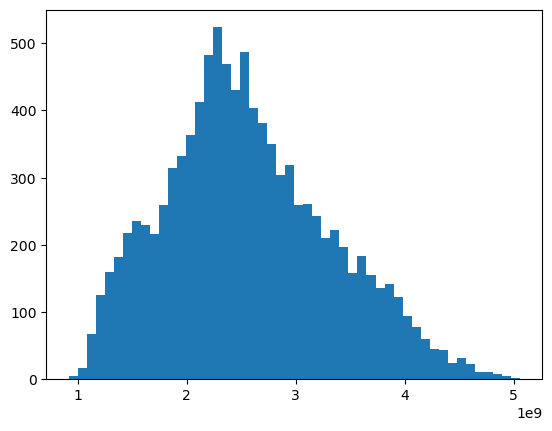

In [378]:
plt.hist(POES_values, bins=50)

In [379]:
POES_values=pd.DataFrame(POES_values)
POES_values.describe()

,0
count,1.000000e+04
mean,2.558991e+09
std,7.599794e+08
min,9.161927e+08
25%,2.028546e+09
50%,2.481862e+09
75%,3.051549e+09
max,5.057019e+09


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.34712e-19] [loc=2558991388.343 scale=759941368.987]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.94613e-18] [loc=916192706.139 scale=1642798682.204]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 3.87871e-18] [loc=916192706.139 scale=0.000]
[distfit] >INFO> [dweibull  ] [0.22 sec] [RSS: 2.41449e-19] [loc=2575499199.462 scale=659260890.057]
[distfit] >INFO> [t         ] [0.58 sec] [RSS: 1.31963e-19] [loc=2554085973.896 scale=757498709.292]
[distfit] >INFO> [genextreme] [0.68 sec] [RSS: 3.88068e-18] [loc=916192706.187 scale=0.807]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 7.17624e-20] [loc=-4196593.676 scale=230182684.281]
[distfit] >INFO> [lognorm   ] [0.31 sec] [RSS: 1.43474e-19] [loc=395541744.013 scale=2032199408.709]
[distfit] >INFO> [beta      ] [0.15 sec] [RSS: 8.38021e-20] [loc=895295419.223 scale=4653746516.395]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1.43004e-18] [lo

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=11.1355, loc=-4.19659e+06, scale=2.30183e+08)'}, xlabel='Values', ylabel='Frequency'>)

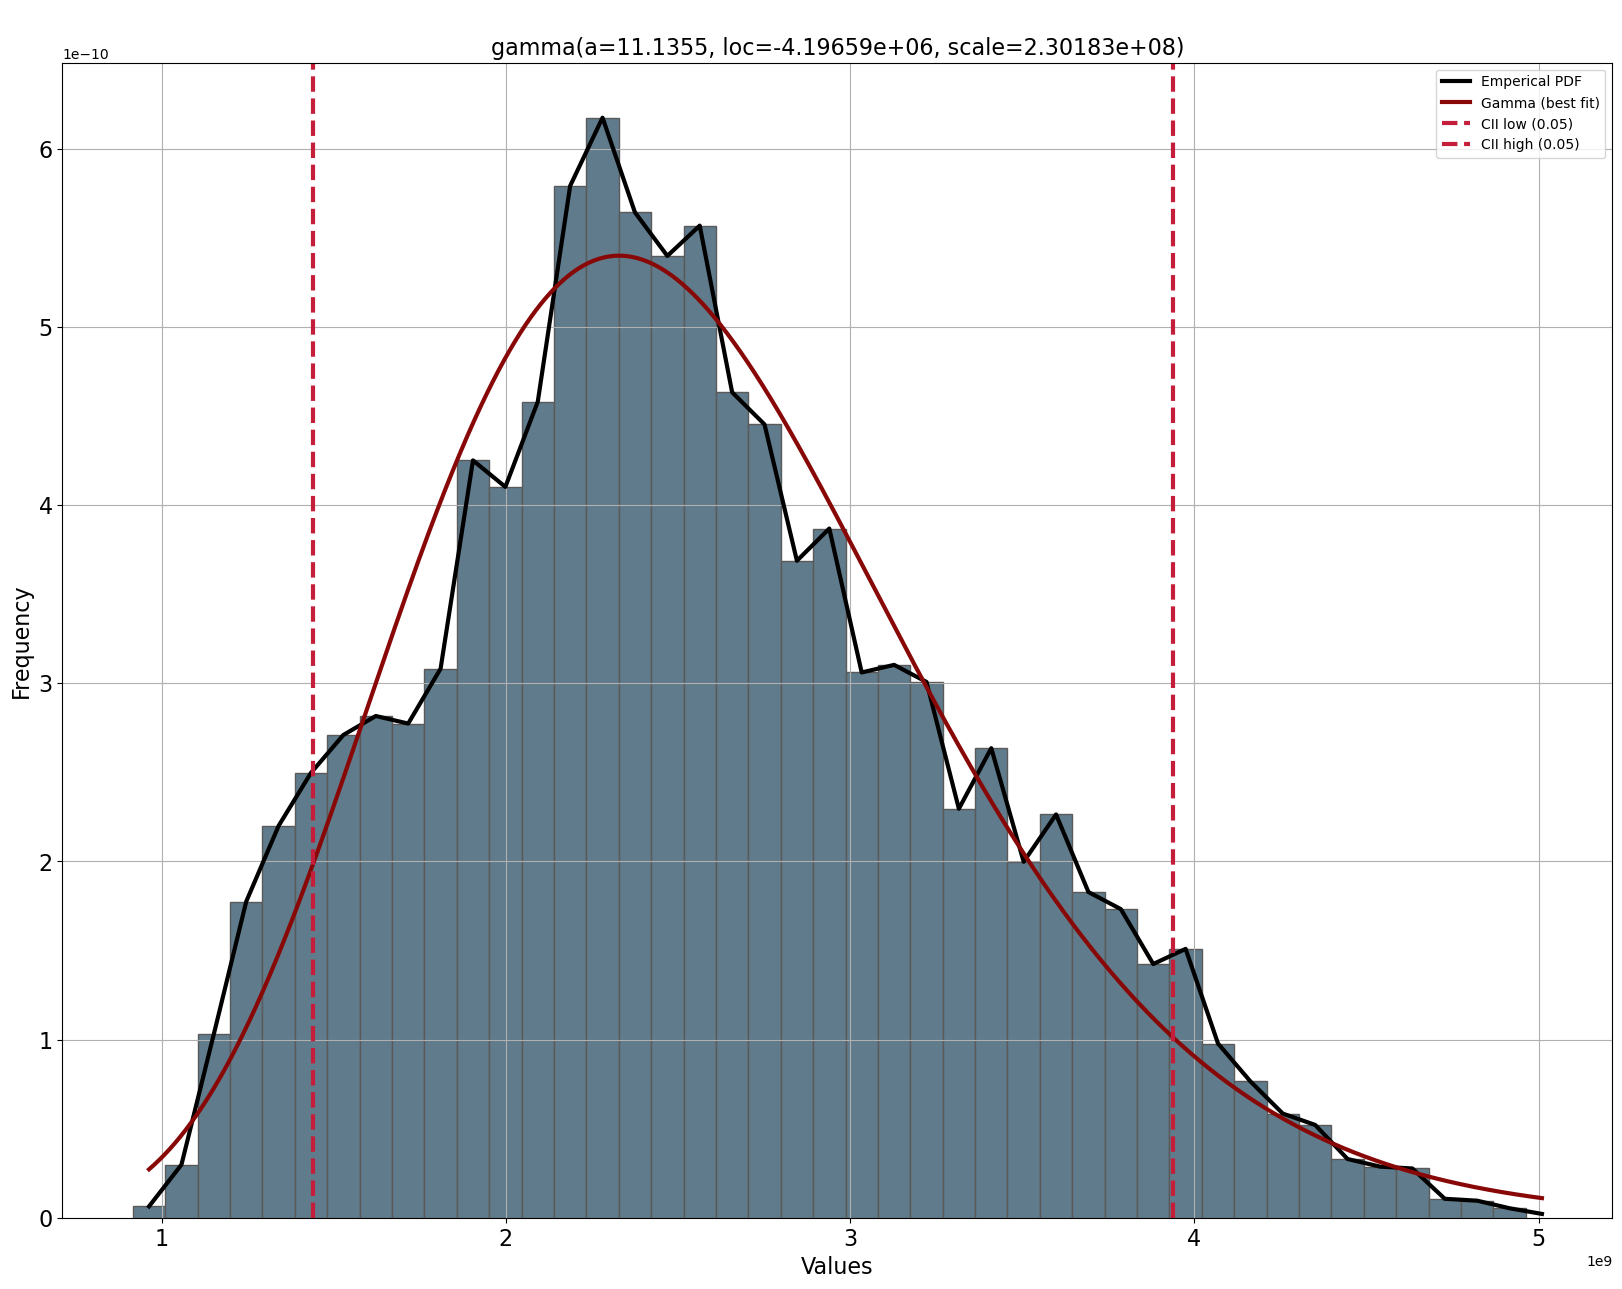

In [380]:
from distfit import distfit
dfit = distfit(todf=True)
dfit.fit_transform(POES_values[0])
dfit.plot()

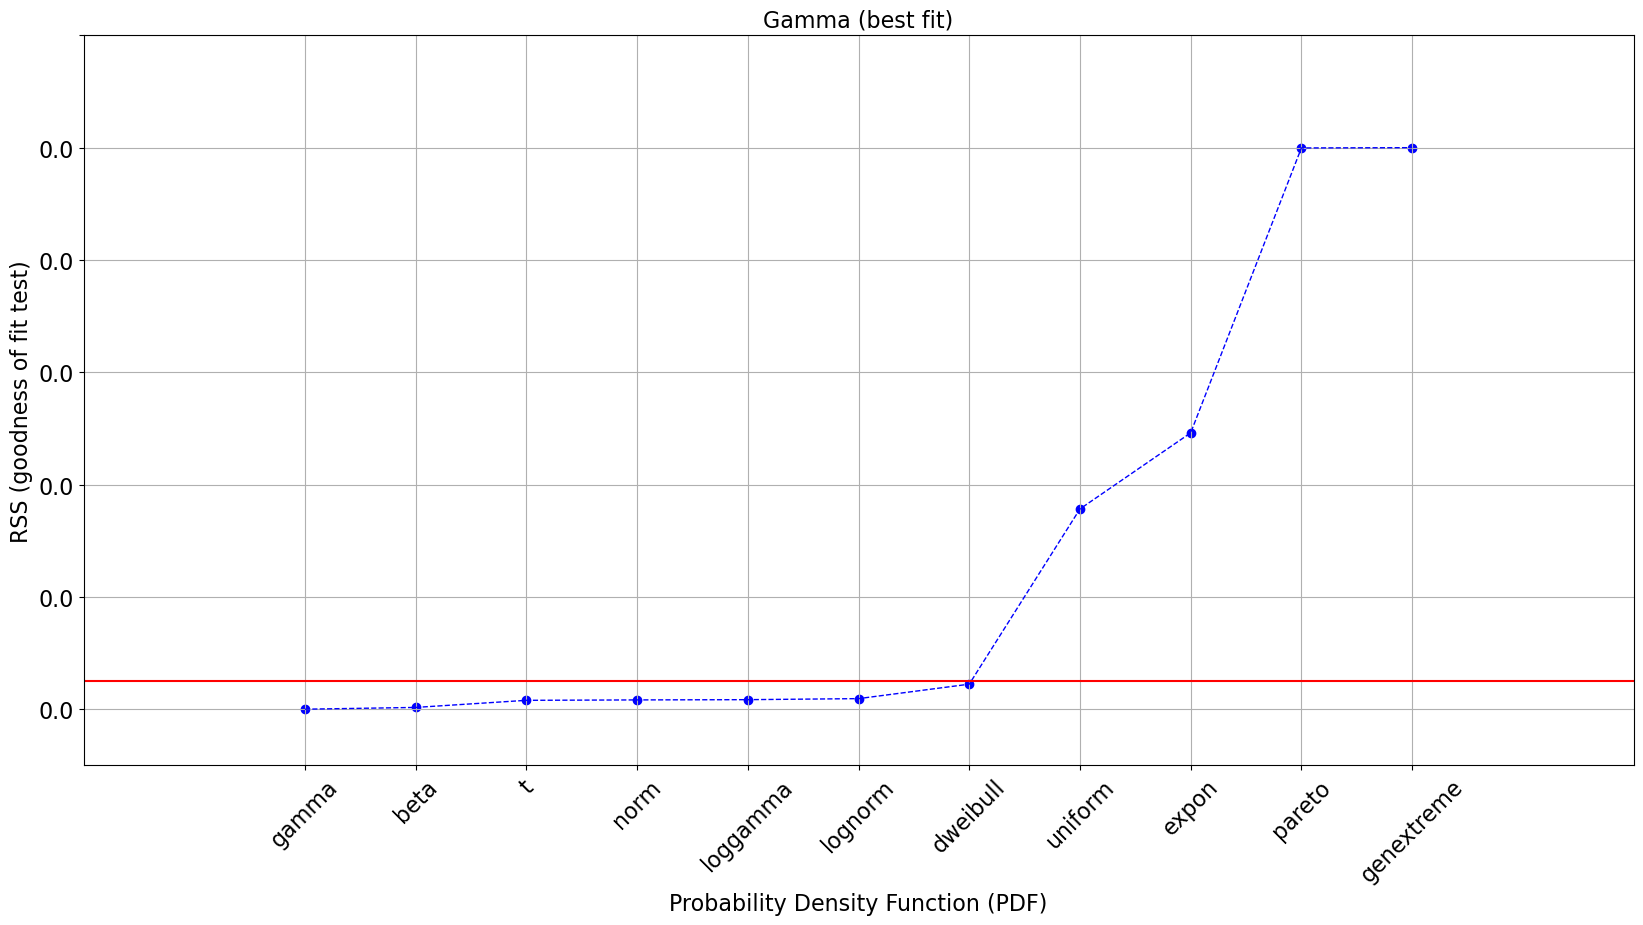

In [381]:
dfit.plot_summary()
plt.axhline(y = 0.05, color = 'r', linestyle = '-')
plt.show()

Intervalo de Confianza para la Media (95%): (2554479890.6326003, 2563502886.053695)
Percentil 10: 1636951563.413409
Percentil 50: 2482685611.054884
Percentil 90: 3579411033.1663256


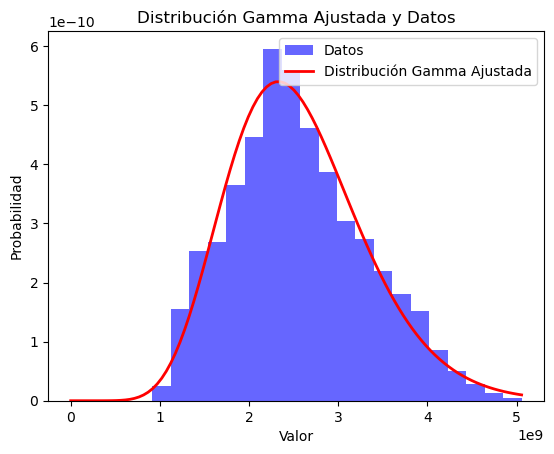

In [383]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Supongamos que 'POES_values' es un DataFrame y deseas analizar la primera columna (índice 0)
data_to_fit = POES_values.iloc[:, 0]

# Ajustar los datos a una distribución gamma
shape, loc, scale = stats.gamma.fit(data_to_fit)

#Generar el intervalo de confianza para la media (95%)
confidence_level = 0.95  # Nivel de confianza del 95%
n = len(data_to_fit)  # Tamaño de la muestra
mean = np.mean(data_to_fit)
std_error = scale / np.sqrt(n)
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
lower_confidence_interval = mean - z_critical * std_error
upper_confidence_interval = mean + z_critical * std_error

# Calcular los percentiles 10, 50 y 90
percentile_10 = stats.gamma.ppf(0.1, shape, loc=loc, scale=scale)
percentile_50 = stats.gamma.ppf(0.5, shape, loc=loc, scale=scale)
percentile_90 = stats.gamma.ppf(0.9, shape, loc=loc, scale=scale)

# Imprimir los resultados
print(f"Intervalo de Confianza para la Media (95%): ({lower_confidence_interval}, {upper_confidence_interval})")
print(f"Percentil 10: {percentile_10}")
print(f"Percentil 50: {percentile_50}")
print(f"Percentil 90: {percentile_90}")

# Graficar el histograma de los datos y la distribución gamma ajustada
plt.hist(data_to_fit, bins=20, density=True, alpha=0.6, color='b', label='Datos')
x = np.linspace(0, data_to_fit.max(), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Distribución Gamma Ajustada')
plt.legend()
plt.title('Distribución Gamma Ajustada y Datos')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.show()


## Punto 4


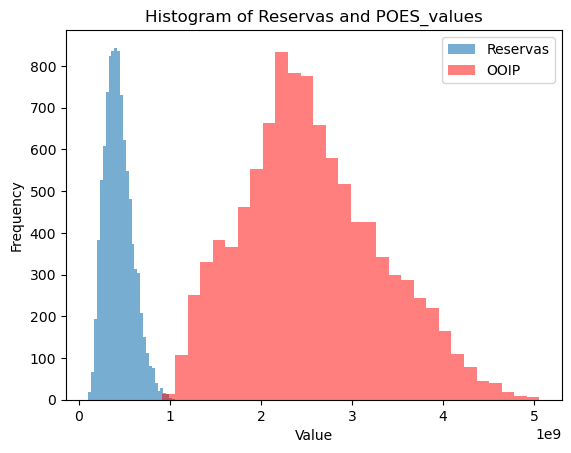

Reservas:
                  0
count  1.000000e+04
mean   4.358146e+08
std    1.518629e+08
min    1.038579e+08
25%    3.238542e+08
50%    4.188296e+08
75%    5.296017e+08
max    1.052215e+09

OOIP:
                  0
count  1.000000e+04
mean   2.558991e+09
std    7.599794e+08
min    9.161927e+08
25%    2.028546e+09
50%    2.481862e+09
75%    3.051549e+09
max    5.057019e+09


In [410]:

# Generate random values for 'Rf' with a normal distribution
Rf = norm.rvs(loc=0.17, scale=0.03, size=10000)
Rf = pd.DataFrame(Rf)

# Create a DataFrame for 'POES_values' (assuming it's a DataFrame)
POES_values = pd.DataFrame(POES_values)

# Calculate the product of 'Rf' and 'POES_values'
Reservas = Rf * POES_values

# Create histograms for 'Reservas' and 'POES_values'
plt.hist(Reservas, bins=30, alpha=0.6, label='Reservas')
plt.hist(POES_values, bins=30, color='red', alpha=0.5, label='OOIP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Reservas and POES_values')
plt.show()

# Print the describe() output for 'Reservas' and 'POES_values' with labels
print("Reservas:")
print(Reservas.describe().to_string() + "\n")

print("OOIP:")
print(POES_values.describe().to_string())


In [126]:
Reservas.describe()

,0
count,1.000000e+04
mean,4.379255e+08
std,8.361918e+08
min,-3.372877e+09
25%,-6.299170e+07
50%,3.945699e+08
75%,8.949972e+08
max,5.610294e+09


In [334]:
st.t.interval(confidence=0.95, df=len(Reservas)-1,loc=Reservas.mean(),scale=Reservas.std()/math.sqrt(len(Reservas)))

(array([4.30753852e+08]), array([4.62514537e+08]))

## Parte Bono (Creación de la variable H)

## Creación de la variable Multinomial

(array([  55., 1184.,  822.,  146.,  299.,  575.,  977., 1542., 2103.,
        2297.]),
 array([158.40623721, 180.56482508, 202.72341296, 224.88200084,
        247.04058872, 269.1991766 , 291.35776448, 313.51635236,
        335.67494024, 357.83352812, 379.992116  ]),
 <BarContainer object of 10 artists>)

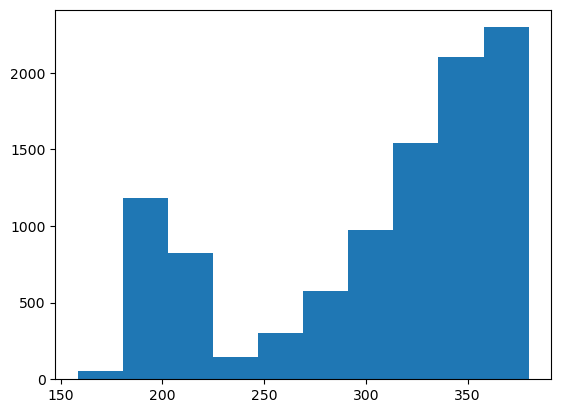

In [357]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 200, 10
mu2, sigma2 = 380, 40
X1 = np.random.normal(mu, sigma, 2000)
X2 = np.random.normal(mu2, sigma2, 8000)
left_skew_factor = 1.5  # Adjust this value to control the skewness
X2 = mu2 - left_skew_factor * np.abs(X2 - mu2)
X = np.concatenate([X1, X2])
plt.hist(X)

